In [120]:
#Run1
%matplotlib inline

import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datetime import datetime
from dateutil.parser import parse
# from googletrans import Translator

plt.style.use('ggplot')

import itertools
import warnings
warnings.filterwarnings('ignore')

#models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

In [ ]:
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize, sent_tokenize
# from nltk.stem.porter import PorterStemmer
# from nltk.stem.snowball import SnowballStemmer
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk import pos_tag

In [48]:
#Run2
#Creates a text label above each bar in *rects*, displaying its height.
def autolabel(rects, orientation='vert'):
    #prints value above vertical bars
    if orientation=='vert':
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(int(height)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        weight = 'bold',
                        textcoords="offset points",
                        ha='center', va='bottom',
                        size=15)
    #Prints value to the right of horizontal bars
    elif orientation=='hort':
        for rect in rects:
            width = rect.get_width()
            ax.annotate('{}'.format(int(width)),
                        xy=(width, rect.get_y() + rect.get_height() / 2),
                        xytext=(3,-6),
                        textcoords="offset points",
                        size=15)

In [35]:
#Run3
#Creates a text label above each bar in *rects*, displaying its height.
def autolabel_percent(rects, orientation='vert'):
    #Prints percentage above bars for vertical bars
    if orientation=='vert':
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{0:.2f}%'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        weight = 'bold',
                        textcoords="offset points",
                        ha='center', va='bottom',
                        size=15)
    #Prints percentages to the right of bars in horizontal bars
    elif orientation=='hort':
        for rect in rects:
            width = rect.get_width()
            ax.annotate("{0:.2f}%".format(width),
                        xy=(width, rect.get_y() + rect.get_height() / 2),
                        xytext=(3,-6),
                        textcoords="offset points",
                        size=15)

In [71]:
#Run5
#Print functions for bar graphs specifically
def print_bar(x, y, x_label, y_label, title='insert title', orientation='vert', color='blue', 
              width=0.65, fig_size=(23,7), percentage=False, weight='bold', tick_size=20, title_size=30):
    
    fig, ax = plt.subplots(figsize=fig_size)
    if orientation=='vert':
        bars_for_annotation = ax.bar(x, y, color=color, align='center', width=width)
    elif orientation=='hort':
        bars_for_annotation = ax.barh(x, y, color=color, align='center')
        
    plt.xticks(size = 13, rotation=90)
    plt.yticks(size = 15)
    plt.xlabel(x_label, size=tick_size, color=color)
    plt.ylabel(y_label, size=tick_size, color=color)
    plt.title(title, fontsize=title_size, color=color)
        
    if percentage:
        autolabel_percent(bars_for_annotation, orientation)
    elif not percentage:
        autolabel(bars_for_annotation, orientation)
    
    plt.show()

In [ ]:
# #TODO: preprocessing the data (uncomment later)
# #Run6
# useless_listing_columns = ['square_feet','country','listing_url','scrape_id','last_scraped','experiences_offered', 'license', 
#                    'xl_picture_url','host_url','host_name','host_thumbnail_url','street','host_listings_count',
#                    'neighbourhood_group_cleansed','state','market', 'calendar_last_scraped','host_picture_url',
#                    'host_acceptance_rate', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
#                    'maximum_maximum_nights', 'jurisdiction_names', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
#                    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms','maximum_nights_avg_ntm',
#                    'has_availability','country_code','host_acceptance_rate','thumbnail_url','medium_url','weekly_price','monthly_price',
#                    'calendar_updated','is_business_travel_ready', 'interaction', 'interaction', 'house_rules']

# def preprocessing(path):
#     #load the LISTINGS csv
#     processed_listings_df = pd.read_csv(path+'listings.csv')
#     #drop useless columns
#     processed_listings_df.drop(columns = useless_listing_columns, inplace=True)
    
#     #load the CALENDAR csv
#     processed_calendar_df = pd.read_csv(path+'calendar.csv')
#     #Convert date strings to datetime type
#     date_time = pd.Series([datetime.strptime(x, '%Y-%m-%d') for x in processed_calendar_df['date']])
#     processed_calendar_df['date'] = date_time
    
#     #load the REVIEWS csv
#     processed_reviews_df = pd.read_csv(path+'reviews.csv')
#     #Drop useless columns. Id of review and the reviewer's name
#     processed_reviews_df.drop(columns=['id', 'reviewer_name'], inplace=True)

#     return processed_listings_df, processed_calendar_df, processed_reviews_df

In [5]:
# #save new csv
# singapore = 'Data/Singapore/'
# london = 'Data/London/'
# paris = 'Data/Paris/'

# # paris_data_shortened.to_csv (paris+'shortened_listings.csv', index = None, header=True)

## Dictionary for ISO-639 to Names

In [175]:
#https://pypi.org/project/iso-639/
from iso639 import languages

#Create dictionary on types of languages available
keys = ['af', 'am', 'an', 'ar', 'as', 'az', 'be', 'bg', 'bn', 'br', 'bs',
        'ca', 'cs', 'cy', 'da', 'de', 'dz', 'el', 'en', 'eo', 'es', 'et', 
        'eu', 'fa', 'fi', 'fr', 'ga', 'gl', 'gu', 'he', 'hi', 'hr', 'ht',
        'hu', 'hy', 'id', 'is', 'it', 'ja', 'jv', 'ka', 'kk', 'km', 'kn', 
        'ko', 'ku', 'ky', 'la', 'lb', 'lo', 'lt', 'lv', 'mg', 'mk', 'ml', 
        'mn', 'mr', 'ms', 'mt', 'nb', 'ne', 'nl', 'nn', 'no', 'oc', 'or', 
        'pa', 'pl', 'ps', 'pt', 'qu', 'ro', 'ru', 'rw', 'se', 'si', 'sk', 
        'sl', 'so', 'sq', 'sv', 'sw', 'ta', 'te', 'th', 'tl', 'tr', 'ug', 
        'uk', 'ur', 'vi', 'vo', 'wa', 'xh', 'zh', 'zu']

#convert iso-639 to iso language name
iso_name = [languages.get(alpha2=x).name for x in keys]

language_dict = {}
for idx, val in enumerate(keys):
    language_dict[val] = iso_name[idx]
    
language_dict['nonsense'] = 'nonsense'

## REVIEWS: CLEANING (PARIS)

In [185]:
#https://pypi.org/project/langua/
from langua import Predict
p = Predict()

In [186]:
#REVIEWS (PT1)
#Load up Reviews (Paris)
paris_reviews = pd.read_csv(paris + 'reviews.csv')

#Drop useless columns. Id of review and the reviewer's name
paris_reviews.drop(columns=['id', 'reviewer_name'], inplace=True)

In [187]:
#REVIEWS (PT2)
#detect language of reviewers
#https://pypi.org/project/langdetect/
import langdetect as ld
#remove the rows with blank comments or not enough info
paris_reviews = paris_reviews.loc[paris_reviews['comments'].notna()]
# paris_reviews = paris_reviews.loc[paris_reviews['comments'].str.len()>20]

review_language = []

for idx, val in enumerate(paris_reviews['comments']):
    try:
        review_language.append(ld.detect(val))
    except:
        review_language.append('nonsense')

# review_language = pd.Series([ld.detect(x[:50]) for x in paris_reviews['comments']])
review_language = ['zh' if x=='zh-cn' or x=='zh-tw' else x for x in review_language]
paris_reviews['language_code'] = review_language
#DO NOT RUN

In [188]:
reviews_full_language = [language_dict[x] for x in review_language]
paris_reviews['language'] = reviews_full_language

In [189]:
#REVIEWS (PT3)
#Convert date strings to datetime type ###TODO check and update
date_time = pd.Series([datetime.strptime(x, '%Y-%m-%d') for x in paris_reviews['date']])
paris_reviews['date'] = date_time

In [190]:
#Remove all commas in comments
reviews_no_commas = [x.replace(',','') for x in paris_reviews['comments']]
paris_reviews['comments'] = reviews_no_commas

In [299]:
#Remove date in paris_reviews
paris_reviews.drop(columns=['date'], inplace=True)

In [301]:
#REVIEWS (PT4)
paris_reviews.to_csv('Data/Paris/updated_reviews.csv')

In [ ]:
#REVIEWS ARE CLEANED. NO NEED FOR MORE PREPROCESSING

## LISTINGS: CLEANING (PARIS)

In [309]:
#Load up listings
paris_listings = pd.read_csv('Data/Paris/listings.csv')

/Users/winrichsy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [310]:
#drop useless columns (Paris)
useless_columns = ['square_feet','country','listing_url','scrape_id','last_scraped','experiences_offered', 'license', 
                   'xl_picture_url','host_url','host_name','host_thumbnail_url','street','host_listings_count',
                   'neighbourhood_group_cleansed','state','market', 'calendar_last_scraped','host_picture_url',
                   'host_acceptance_rate', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                   'maximum_maximum_nights', 'jurisdiction_names', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms','maximum_nights_avg_ntm',
                   'has_availability','country_code','host_acceptance_rate','thumbnail_url','medium_url','weekly_price','monthly_price',
                   'calendar_updated','is_business_travel_ready', 'interaction', 'interaction', 'house_rules', 'experiences_offered']
paris_listings_shortened = paris_listings.drop(columns = useless_columns)

In [311]:
#detect language of hosts
#1. Get only the description that are not empty
#2. Get descriptions that are more than 20, overstepping random symbols
paris_listings_shortened = paris_listings_shortened.loc[paris_listings_shortened['description'].notna()]
paris_listings_shortened = paris_listings_shortened.loc[paris_listings_shortened['description'].str.len()>20]

listing_language = [p.get_lang(x) for x in paris_listings_shortened['description']]
listing_language = ['zh' if x=='zh-cn' or x=='zh-tw' else x for x in listing_language]

paris_listings_shortened['language_code'] = listing_language
#DO NOT RUN AGAIN UNTIL THE END: TAKES FOREVER

In [334]:
listing_full_language = [language_dict[x] for x in listing_language]
paris_listings_shortened['language'] = listing_full_language

In [321]:
needed_columns = ['id', 'name', 'summary', 'space', 'description', 'host_id', 'host_since', 'host_about',
                  'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_total_listings_count',
                  'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude',
                  'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
                  'security_deposit', 'cleaning_fee', 'minimum_nights', 'number_of_reviews', 'review_scores_rating',
                  'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                  'review_scores_location', 'review_scores_value', 'cancellation_policy', 'requires_license', 'reviews_per_month',
                  'require_guest_phone_verification', 'language']
updated_listings = paris_listings_shortened.loc[:,needed_columns]



In [197]:
#reading past updated csv file
updated_listings = pd.read_csv('Data/Paris/updated_listings.csv')

In [208]:
#go through and replace all the nans
no_nans_summary = ['nan' if isinstance(x,float) else x for x in updated_listings['summary']]
updated_listings['summary'] = no_nans_summary

no_nans_space = ['nan' if isinstance(x,float) else x for x in updated_listings['space']]
updated_listings['space'] = no_nans_space

no_nans_description = ['nan' if isinstance(x,float) else x for x in updated_listings['description']]
updated_listings['description'] = no_nans_description

no_nans_host_about = ['nan' if isinstance(x,float) else x for x in updated_listings['host_about']]
updated_listings['host_about'] = no_nans_host_about

In [289]:
def remove_commas(x):
    return x.replace(',','')

In [223]:
#Remove all commas for easier spark separator
#name, summary, space, description, host_about
#Todo: something about cancellation_policy
check_string = ','

summary_no_commas = [remove_commas(x) for x in updated_listings['summary']]
updated_listings['summary'] = summary_no_commas

space_no_commas = [remove_commas(x) for x in updated_listings['space']]
updated_listings['space'] = space_no_commas

description_no_commas = [remove_commas(x) for x in updated_listings['description']]
updated_listings['description'] = description_no_commas

host_about_no_commas = [remove_commas(x) for x in updated_listings['host_about']]
updated_listings['host_about'] = host_about_no_commas

notes_no_commas = [remove_commas(x) for x in updated_listings['notes']]
updated_listings['notes'] = notes_no_commas

transit_no_commas = [remove_commas(x) for x in updated_listings['transit']]
updated_listings['transit'] = transit_no_commas

access_no_commas = [remove_commas(x) for x in updated_listings['access']]
updated_listings['access'] = access_no_commas

In [231]:
#save newly updated csv
updated_listings.to_csv('Data/Paris/updated_listings.csv')

## CALENDAR: CLEANING (PARIS)

In [344]:
#Load up Calendar (Paris)
paris_calendar = pd.read_csv(paris + 'calendar.csv')

#Convert date strings to datetime type
date_time = pd.Series([datetime.strptime(x, '%Y-%m-%d') for x in paris_calendar['date']])
paris_calendar['date'] = date_time
#DO NOT TOUCH

In [393]:
test_calendar = paris_calendar[(paris_calendar['price'].notnull())]
test_calendar.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'adjusted_price'], inplace=True)

In [398]:
pricing = [x.replace('$','') for x in test_calendar['price']] 
pricing = [float(x.replace(',','')) for x in pricing]
test_calendar['price'] = pricing

In [400]:
week = [x.week for x in test_calendar['date']]
month = [x.month for x in test_calendar['date']]
year = [x.year for x in test_calendar['date']]

In [401]:
test_calendar['week'] = week
test_calendar['month'] = month
test_calendar['year'] = year

In [ ]:
#Save to csv (this one has more info)
test_calendar.to_csv('Data/Paris/the_calendar_to_use.csv')

In [353]:
#Save to csv (has date in timestamp)
paris_calendar.to_csv('Data/Paris/calendar.csv')

## NPL

In [233]:
#NPL pt2: Filter Tokens
import string
stopwords_ = set(stopwords.words('english'))
punctuation_ = set(string.punctuation)

def filter_tokens(sent):
    return([w for w in sent if not w in stopwords_ and not w in punctuation_])

In [234]:
#NPL pt1: Remove Accents
import unicodedata

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode()

In [307]:
def personal_tokenize(sentence, language='english', stemmer='snowball'):
    string = " "
        
    if stemmer=='snowball':
        stemmer_snowball = SnowballStemmer(language)
    
    #remove accents
    input_string = remove_accents(val)

    #tokenize
    sent_tokens = sent_tokenize(input_string)
    tokens = [sent for sent in map(word_tokenize, sent_tokens)]
    tokens_lower = [[word.lower() for word in sent] for sent in tokens]

    #filtering stopwords and punctuations
    tokens_filtered = list(map(filter_tokens, tokens_lower))
    tokens_filtered_list = list(itertools.chain.from_iterable(tokens_filtered))

    #stemming words
    tokens_stemporter = [list(map(stemmer_snowball.stem, sent)) for sent in tokens_filtered]
    return string.join(list(itertools.chain.from_iterable(tokens_stemporter)))
        


## NLP on only English [LISTINGS]

In [259]:
english_listings = updated_listings[updated_listings['language']=='English']

In [260]:
stemmer_snowball = SnowballStemmer('english')

In [261]:
#Tokenize summary
tokenized_summary = []
for idx, val in enumerate(english_listings['summary']):
    tokenized_summary.append(personal_tokenize(val))

english_listings['summary'] = tokenized_summary

#Tokenize space
tokenized_space = []
for idx, val in enumerate(english_listings['space']):
    tokenized_space.append(personal_tokenize(val))
    
english_listings['space'] = tokenized_space

#Tokenize description
tokenized_description = []
for idx, val in enumerate(english_listings['description']):
    tokenized_description.append(personal_tokenize(val))
    
english_listings['description'] = tokenized_description

#Tokenize host about
tokenized_host_about = []
for idx, val in enumerate(english_listings['host_about']):
    tokenized_host_about.append(personal_tokenize(val))
    
english_listings['host_about'] = tokenized_host_about

In [296]:
# #Tokenizing Notes
# tokenized_notes = []
# for idx, val in enumerate(english_listings['notes']):
#     tokenized_notes.append(personal_tokenize(val))
    
# english_listings['notes'] = tokenized_notes

# #Tokenizing Transit
# tokenized_transit = []
# for idx, val in enumerate(english_listings['transit']):
#     tokenized_transit.append(personal_tokenize(val))
    
# english_listings['transit'] = tokenized_transit

# # Tokenizing Access
# tokenized_access = []
# for idx, val in enumerate(english_listings['access']):
#     tokenized_access.append(personal_tokenize(val))
    
# english_listings['access'] = tokenized_access

In [265]:
#Save into new english only csv
english_listings.to_csv('Data/Paris/english_listings.csv')

In [267]:
#host verificaitons and ameneties. need to fix

## NLP on only English [REVIEWS]

In [302]:
updated_reviews = pd.read_csv('Data/Paris/updated_reviews.csv')

In [303]:
english_reviews = updated_reviews[updated_reviews['language']=='English']

In [304]:
english_reviews.drop(columns = ['Unnamed: 0', 'language_code'], inplace=True)

In [305]:
#Tokenize English reviews
tokenized_comments = []
for idx, val in enumerate(english_reviews['comments']):
    tokenized_comments.append(personal_tokenize(val))

english_reviews['comments'] = tokenized_comments

In [306]:
#Save into new english only csv
english_reviews.to_csv('Data/Paris/english_reviews.csv')

## Sparkbook for SQL Queries

In [ ]:
#Run1
#Run docker container
sudo docker run -d --name sparkbook -p 8881:8888 -v "$PWD":/home/jovyan/work jupyter/pyspark-notebook start.sh jupyter lab --LabApp.token=''

#Exec docker container
docker exec -it sparkbook bash

#Run Spark
#go on browser
localhost:8881

In [3]:
#Run2
import pyspark as ps

spark = (ps.sql.SparkSession
         .builder
         .master('local[4]')
         .appName('ParisAirBnb')
         .getOrCreate()
        )

sc = spark.sparkContext
sc

<SparkContext master=local[4] appName=ParisAirBnb>

In [5]:
# #Run3
# paris = 'Data/Paris/'
# paris_listings = spark.read.csv(paris +'updated_listings.csv',
#                            header = True,
#                            sep = "|",
#                            inferSchema = True)

# paris_calendar = spark.read.csv(paris+'the_calendar_to_use.csv',
#                             header = True,
#                             sep = "|",
#                             inferSchema = True)

# paris_reviews = spark.read.csv(paris+'updated_reviews.csv',
#                                      header = True,
#                                      sep = "|",
#                                      inferSchema = True)

# #===========================

In [21]:
paris_listings.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- space: string (nullable = true)
 |-- description: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_since: string (nullable = true)
 |-- host_about: string (nullable = true)
 |-- host_response_time: string (nullable = true)
 |-- host_response_rate: string (nullable = true)
 |-- host_is_superhost: string (nullable = true)
 |-- host_total_listings_count: string (nullable = true)
 |-- host_verifications: string (nullable = true)
 |-- host_has_profile_pic: string (nullable = true)
 |-- host_identity_verified: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- accommodates: string (nullable = true)
 |-- bathrooms: string (nullable = true)
 |-- bedrooms: string (nullable = true)
 |-- beds: string (nullable = true)

In [5]:
paris_calendar.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- listing_id: integer (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- available: string (nullable = true)
 |-- price: string (nullable = true)
 |-- adjusted_price: string (nullable = true)
 |-- minimum_nights: double (nullable = true)
 |-- maximum_nights: double (nullable = true)



In [6]:
paris_reviews.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- listing_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- reviewer_id: string (nullable = true)
 |-- comments: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- language: string (nullable = true)



In [154]:
# from googletrans import Translator
# translator = Translator()

In [169]:
# def translate_text(text, dest_language="en"):
#         # Used to translate using the googletrans library
#         import json
#         translator = Translator()
#         try:
#             translation = translator.translate(text=text, dest=dest_language)
#         except json.decoder.JSONDecodeError:
#             # api call restriction
#             process = subprocess.Popen(["/Applications/Surfshark.app", "d"], stdout=subprocess.PIPE)
#             process.wait()
#             process = subprocess.Popen(["/Applications/Surfshark.app", "c", "canada"], stdout=subprocess.PIPE)
#             process.wait()
#             return Process_Data.translate_text(text=text, dest_language=dest_language)
#         return translation

# import subprocess
# summary = paris_listings_df[['summary', 'language']]
# # english_text = [translator.translate(x['summary']).text if x['language']=='English' else x['summary'] for x in summary]
# english_text = []
# for i, j in summary.iterrows():
# #     translator = Translator()
# #     print('translating j', j)
#     if isinstance(j['summary'], float):
#         english_text.append('nonsense')
#     elif j['language']!='English':
#         english_text.append(translate_text(j['summary']))
#     else:
#         english_text.append(j['summary'])

# EDA and Modeling

## CALENDAR

In [89]:
paris_calendar = spark.read.csv('Data/Paris/the_calendar_to_use.csv',
                            header = True,
                            sep = ",",
                            inferSchema = True)

paris_calendar.createOrReplaceTempView('paris_calendar')

### 1. Cal - Avg Weekly Rate (SKIP)

In [10]:
query = '''SELECT DISTINCT week,month,year,listing_id, SUM(price)/7 as week_avg_price
            FROM paris_calendar
            GROUP BY year,month,week,listing_id
            ORDER BY week_avg_price DESC
            LIMIT 10'''

week_pricing = spark.sql(query)

In [11]:
week_pricing.show()

+----+-----+----+----------+--------------+
|week|month|year|listing_id|week_avg_price|
+----+-----+----+----------+--------------+
|  20|    5|2020|  37267985|      100000.0|
|  42|   10|2020|  37267985|      100000.0|
|  32|    8|2020|  37267985|      100000.0|
|  30|    7|2020|  37267985|      100000.0|
|  49|   12|2019|  37267985|      100000.0|
|  50|   12|2019|  37267985|      100000.0|
|  34|    8|2020|  37267985|      100000.0|
|  15|    4|2020|  37267985|      100000.0|
|  19|    5|2020|  37267985|      100000.0|
|  29|    7|2020|  37267985|      100000.0|
+----+-----+----+----------+--------------+



In [12]:
week_pricing_df = week_pricing.toPandas()

In [ ]:
#plot histogram of weekly rates
color = 'red'
fig, ax = plt.subplots(figsize=(21,12))
max_val = max(week_pricing_df['week_avg_price'])

items, bins, patches = ax.hist(week_pricing_df['week_avg_price'], bins = range(0,max_val+1,10), color = color, alpha=0.7, edgecolor='black', linewidth=1.2)
plt.xticks(range(0,max_val+1,10), size=20)
plt.yticks(size = 20)
plt.xlabel('Prices', size=25, color=color, weight='bold')
plt.ylabel('Number of Listings', size=25, color=color, weight='bold')
plt.title('Number of Listings/n Based on Price', fontsize=30, color=color, weight='bold')

autolabel(patches)

plt.show()

## 1.1 Cal - Avg Monthly Rate (DONE) =NOT IN SLIDES=

In [90]:
query = '''SELECT DISTINCT month,year,listing_id, SUM(price)/30 as month_avg_price
            FROM paris_calendar
            GROUP BY year,month,listing_id
            ORDER BY year,month ASC'''

monthly_pricing = spark.sql(query)

In [91]:
monthly_pricing_df = monthly_pricing.toPandas()

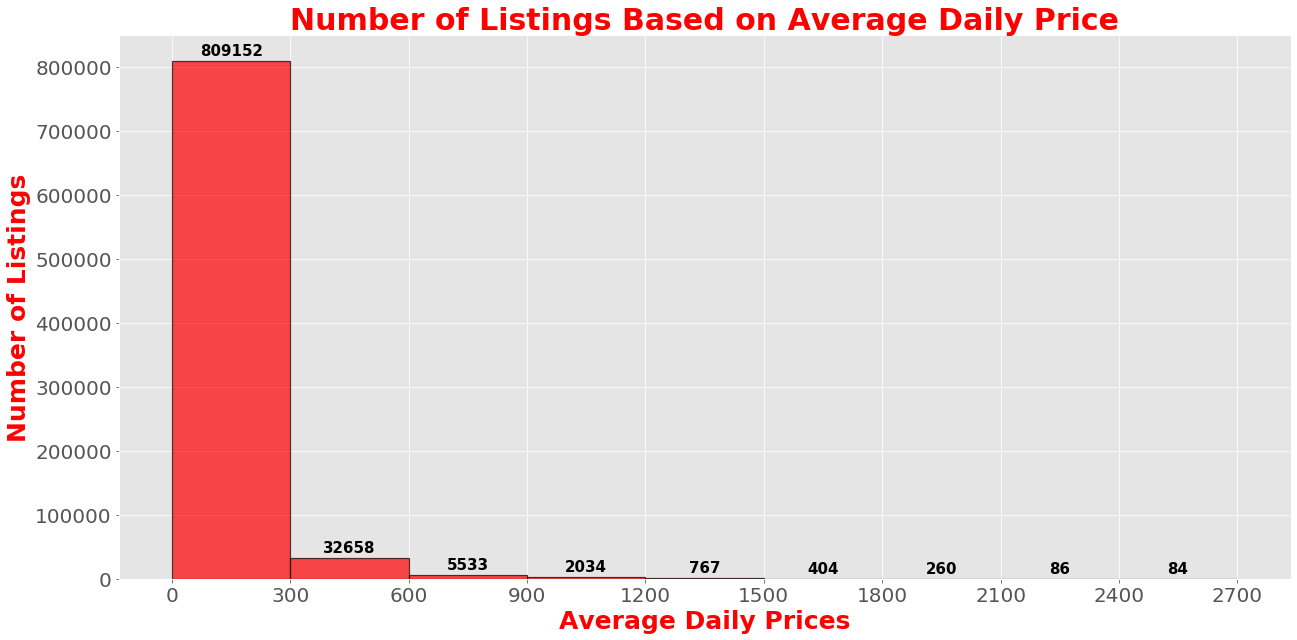

In [92]:
#plot histogram of weekly rates
color = 'red'
fig, ax = plt.subplots(figsize=(21,10))
max_val = int(max(monthly_pricing_df['month_avg_price']))

left, bottom, width, height = [0.55, 0.6, 0.2, 0.2]
# ax2 = fig.add_axes([left, bottom, width, height])

items, bins, patches = ax.hist(monthly_pricing_df['month_avg_price'], bins = np.linspace(0, 2700,10), color = color, alpha=0.7, edgecolor='black', linewidth=1.2)
plt.xticks(np.linspace(0,2700,10), size=20)
plt.yticks(size = 20)
plt.xlabel('Average Daily Prices', size=25, color=color, weight='bold')
plt.ylabel('Number of Listings', size=25, color=color, weight='bold')
plt.title('Number of Listings Based on Average Daily Price', fontsize=30, color=color, weight='bold')
autolabel(patches)

# items, bins, patches = ax2.hist(monthly_pricing_df['month_avg_price'], bins = np.linspace(0, 300,10), color = color, alpha=0.7, edgecolor='black', linewidth=1.2)
# plt.xticks(np.linspace(0,300,10), size=20)
# plt.yticks(size = 20)
# # autolabel(patches)


plt.show()

## 1.2 CAL - INNER Avg Monthly Rate (DONE) =NOT IN SLIDES=

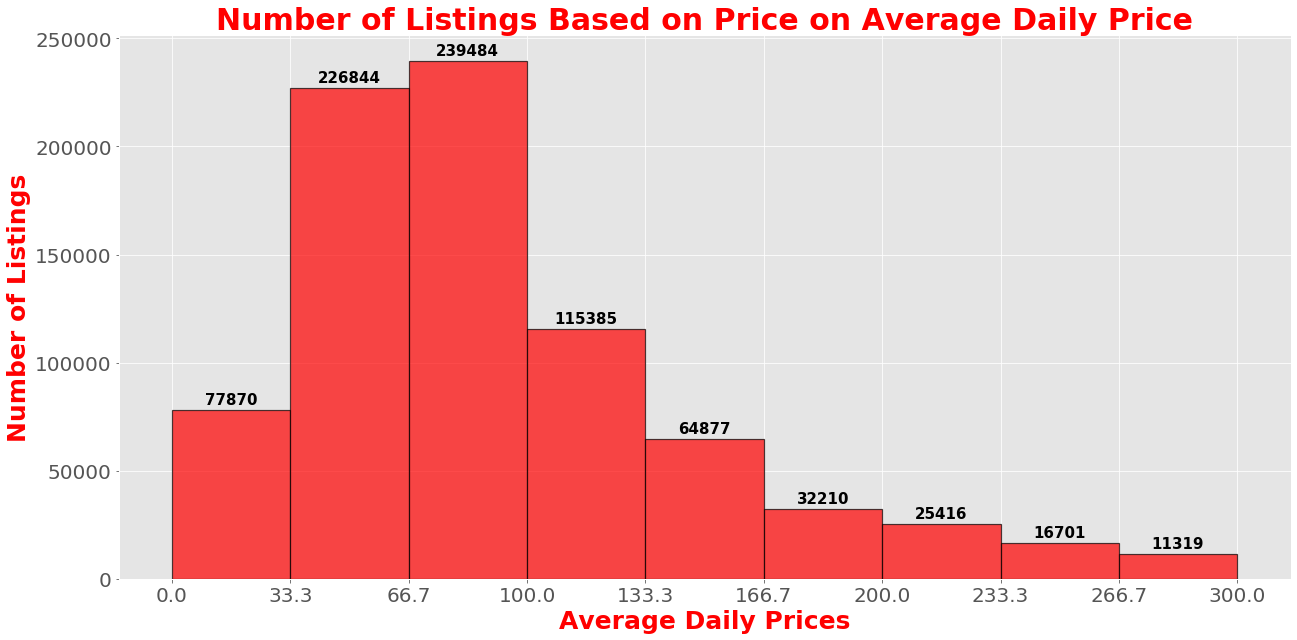

In [93]:
#DONE
#plot histogram of weekly rates
color = 'red'
fig, ax = plt.subplots(figsize=(21,10))
max_val = int(max(monthly_pricing_df['month_avg_price']))

items, bins, patches = ax.hist(monthly_pricing_df['month_avg_price'], bins = np.linspace(0, 300,10), color = color, alpha=0.7, edgecolor='black', linewidth=1.2)
plt.xticks(np.linspace(0,300,10), size=20)
plt.yticks(size = 20)
plt.xlabel('Average Daily Prices', size=25, color=color, weight='bold')
plt.ylabel('Number of Listings', size=25, color=color, weight='bold')
plt.title('Number of Listings Based on Price on Average Daily Price', fontsize=30, color=color, weight='bold')

autolabel(patches)

plt.show()

### 2.1 Cal - count of listings per week (SKIP)

In [52]:
#Cal - count of listings per week
query = '''SELECT DISTINCT week,month,year, COUNT(listing_id) as number_of_listings
            FROM paris_calendar
            WHERE year = 2020
            GROUP BY year, month, week
            ORDER BY year, month, week ASC'''

listing_counts_per_week = spark.sql(query).toPandas()

In [53]:
listing_counts_per_week = listing_counts_per_week.iloc[:64,:]

In [54]:
import os
os.system('say "shits done"')

32512

In [239]:
max(listing_counts_per_week['number_of_listings'])

458444

In [51]:
list_keys = range(64)
list_values = [v for v in listing_counts_per_week['number_of_listings']]
labels = ['Nov 19','Dec 19', 'Jan 20','Feb 20','Mar 20','Apr 20','May 20','Jun 20','July 20','Aug 20','Sept 20','Oct 20', 'Nov 20']

color = 'purple'
fig, ax = plt.subplots(figsize=(21,10))
ax.plot(list_keys, list_values, color = color, linewidth=5)
ax.locator_params(axis='x', tight=True, nbins=13)
ax.margins(x=0)
locs, label = plt.xticks(size = 20, rotation=45)
plt.xticks(locs, labels)
plt.yticks(size = 20)
plt.ylim(0, 500000)
plt.xlabel('Week', size=25, color=color, weight='bold')
plt.ylabel('Number of Listings', size=25, color=color, weight='bold')
plt.title('Number of Listings\n  per Week', fontsize=30, color=color, weight='bold')



NameError: name 'listing_counts_per_week' is not defined

### 2.2 Cal - count of listings per month (DONE) =NOT IN SLIDES=

In [245]:
#Cal - count of listings per month
query = '''SELECT DISTINCT month,year, COUNT(listing_id) as number_of_listings
            FROM paris_calendar
            GROUP BY year, month
            ORDER BY year, month ASC'''

listing_counts_per_month = spark.sql(query).toPandas()

In [246]:
listing_counts_per_month['number_of_listings'][12] += listing_counts_per_month['number_of_listings'][0]

In [247]:
listing_counts_per_month.drop(0, inplace=True)

Text(0.5, 1.0, 'Number of Listings\n  per Month')

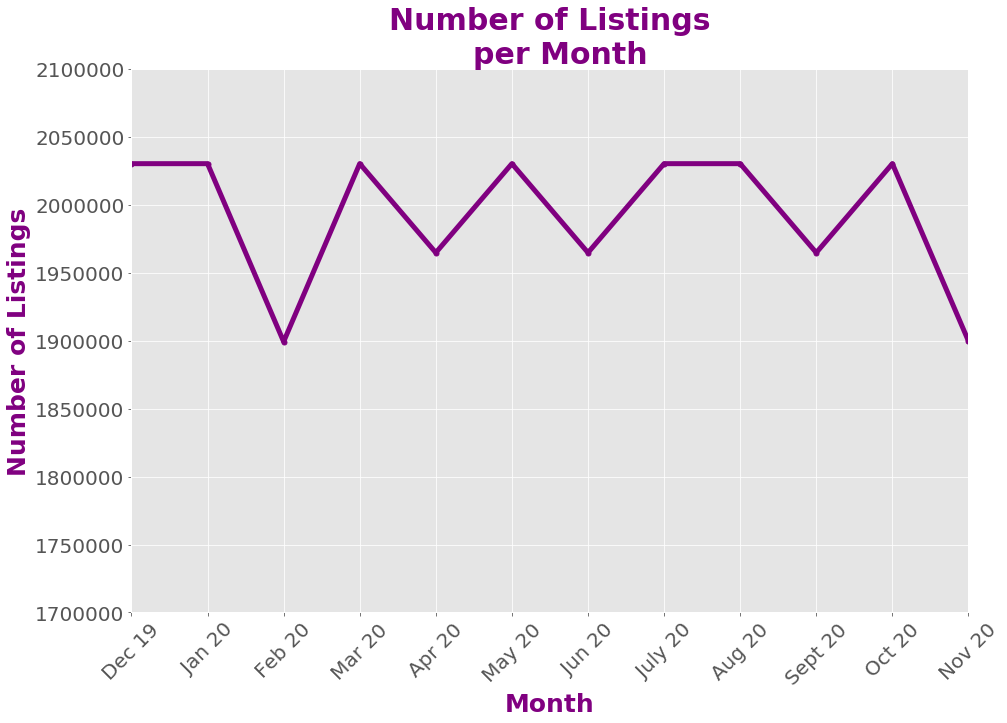

In [249]:
list_keys = ['Dec 19', 'Jan 20','Feb 20','Mar 20','Apr 20','May 20','Jun 20','July 20','Aug 20','Sept 20','Oct 20', 'Nov 20']
list_values = [v for v in listing_counts_per_month['number_of_listings']]


color = 'purple'
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(list_keys, list_values, color = color, marker='o', linewidth=5, markersize=5)
ax.margins(x=0)
plt.xticks(size = 20, rotation=45)
plt.yticks(size = 20)
plt.ylim(1700000, 2100000)
plt.xlabel('Month', size=25, color=color, weight='bold')
plt.ylabel('Number of Listings', size=25, color=color, weight='bold')
plt.title('Number of Listings\n  per Month', fontsize=30, color=color, weight='bold')



### 3. Cal - Plot price timeline of prices

### 4. Cal - Plot heat map of avg prices per month of each listing (SKIP)
[problem. kernel keeps restarting]

In [ ]:
query = '''SELECT DISTINCT id, list'''

In [ ]:
calendar_test = pd.read_csv('Data/Paris/the_calendar_to_use.csv')
calendar_test.columns

In [ ]:
listing_test = pd.read_csv('Data/Paris/updated_listings.csv')

In [ ]:
listing_test.columns

### 5. Cal - Model to determine/predict price of listings

## Listings SPARK

## 1.1 Top 10 languages of listers/hosts (DONE) =NOT IN SLIDES=

In [19]:
#paris LISTINGS
paris_listings_language_df = spark.read.csv('Data/Paris/listing_languages.csv',
                            header = True,
                            sep = ",",
                            inferSchema = True)

paris_listings_language_df.createOrReplaceTempView('paris_listings_language_df')

In [94]:
query = '''SELECT *
            FROM(
                SELECT DISTINCT(language), COUNT(language) as count
                FROM paris_listings_language_df
                GROUP BY language
                ORDER BY count DESC
                LIMIT 10) as sub_query
            ORDER BY count ASC'''

listing_language = spark.sql(query).toPandas()

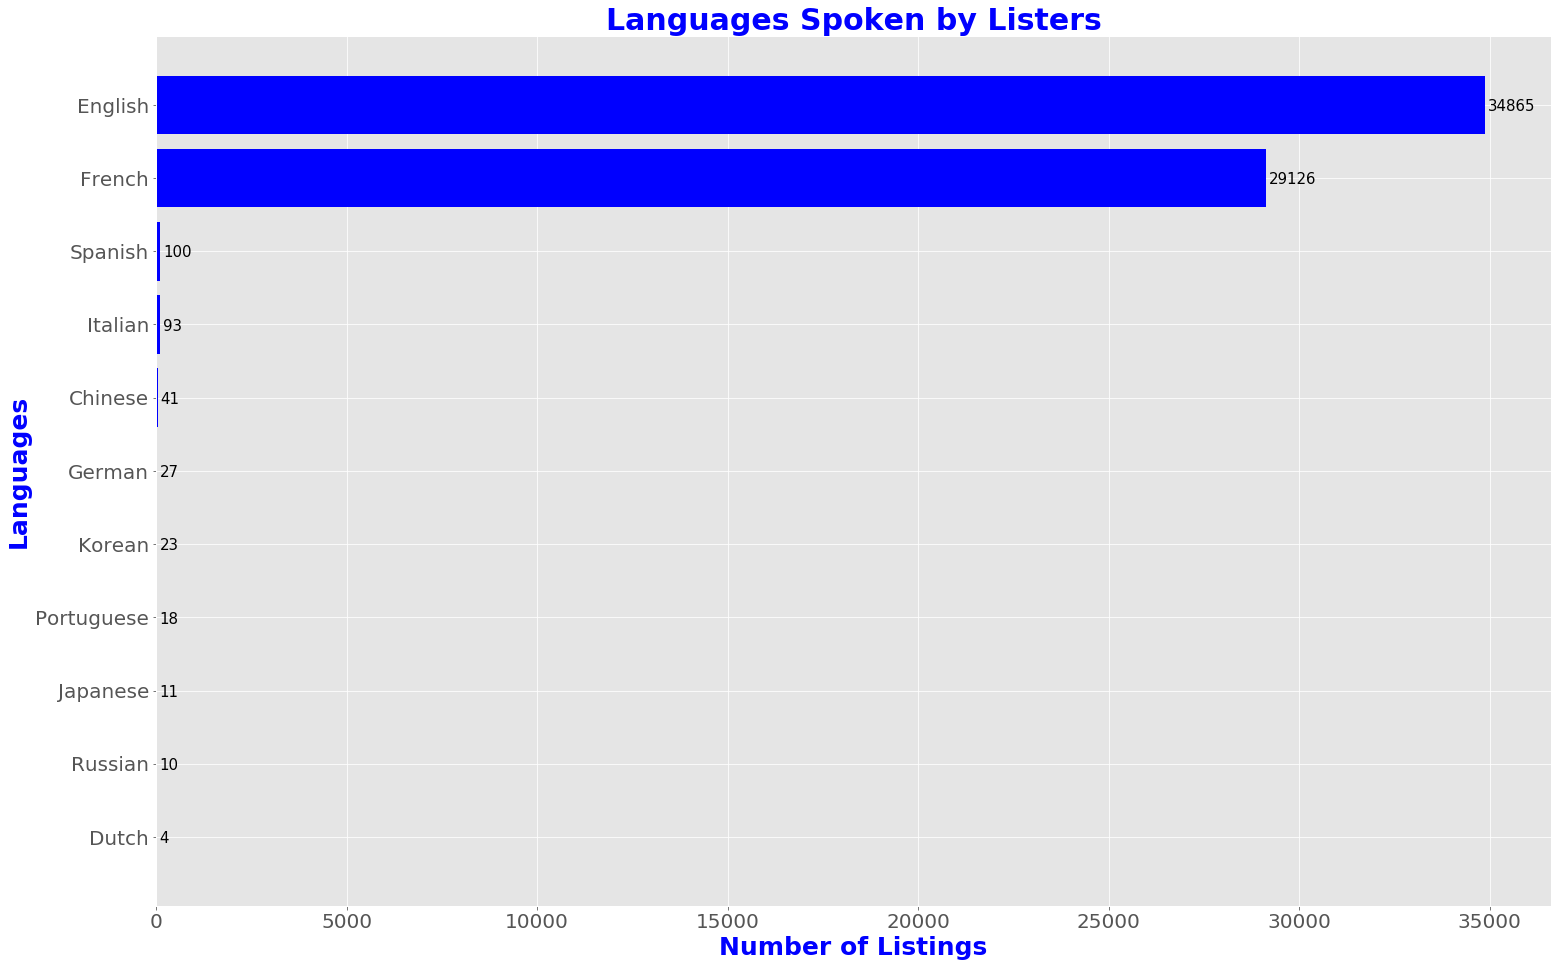

In [87]:
color = 'blue'
fig, ax = plt.subplots(figsize=(25,16))
items = ax.barh(listing_language['language'], listing_language['count'], color = color, align='center')
plt.xticks(size = 20, rotation=0)
plt.yticks(size = 20)
plt.xlabel('Number of Listings', size=25, color=color, weight='bold')
plt.ylabel('Languages', size=25, color=color, weight='bold')
plt.title('Languages Spoken by Listers', fontsize=30, color=color, weight='bold')

autolabel(items, orientation='hort')

plt.show()

## 1.2 Top 10 types of languages of renters throughout entirty (DONE) =NOT IN SLIDES=

In [76]:
paris_listings = pd.read_csv('Data/Paris/updated_listings.csv')

In [87]:
language_paris_listings = paris_listings.loc[:,['id','language']]

In [94]:
language_paris_listings.to_csv('Data/Paris/listing_languages.csv')

In [18]:
#paris REVIEWS
paris_reviews_df = spark.read.csv('Data/Paris/updated_reviews.csv',
                            header = True,
                            sep = ",",
                            inferSchema = True)

paris_reviews_df.createOrReplaceTempView('paris_reviews_df')

In [45]:
query = '''SELECT *
            FROM(
                SELECT DISTINCT(language), COUNT(language) as count
                FROM paris_reviews_df
                GROUP BY language 
                ORDER BY count DESC
                LIMIT 10) as sub_query
            ORDER BY count ASC'''

language_count_df = spark.sql(query)

In [46]:
language_count = language_count_df.toPandas()

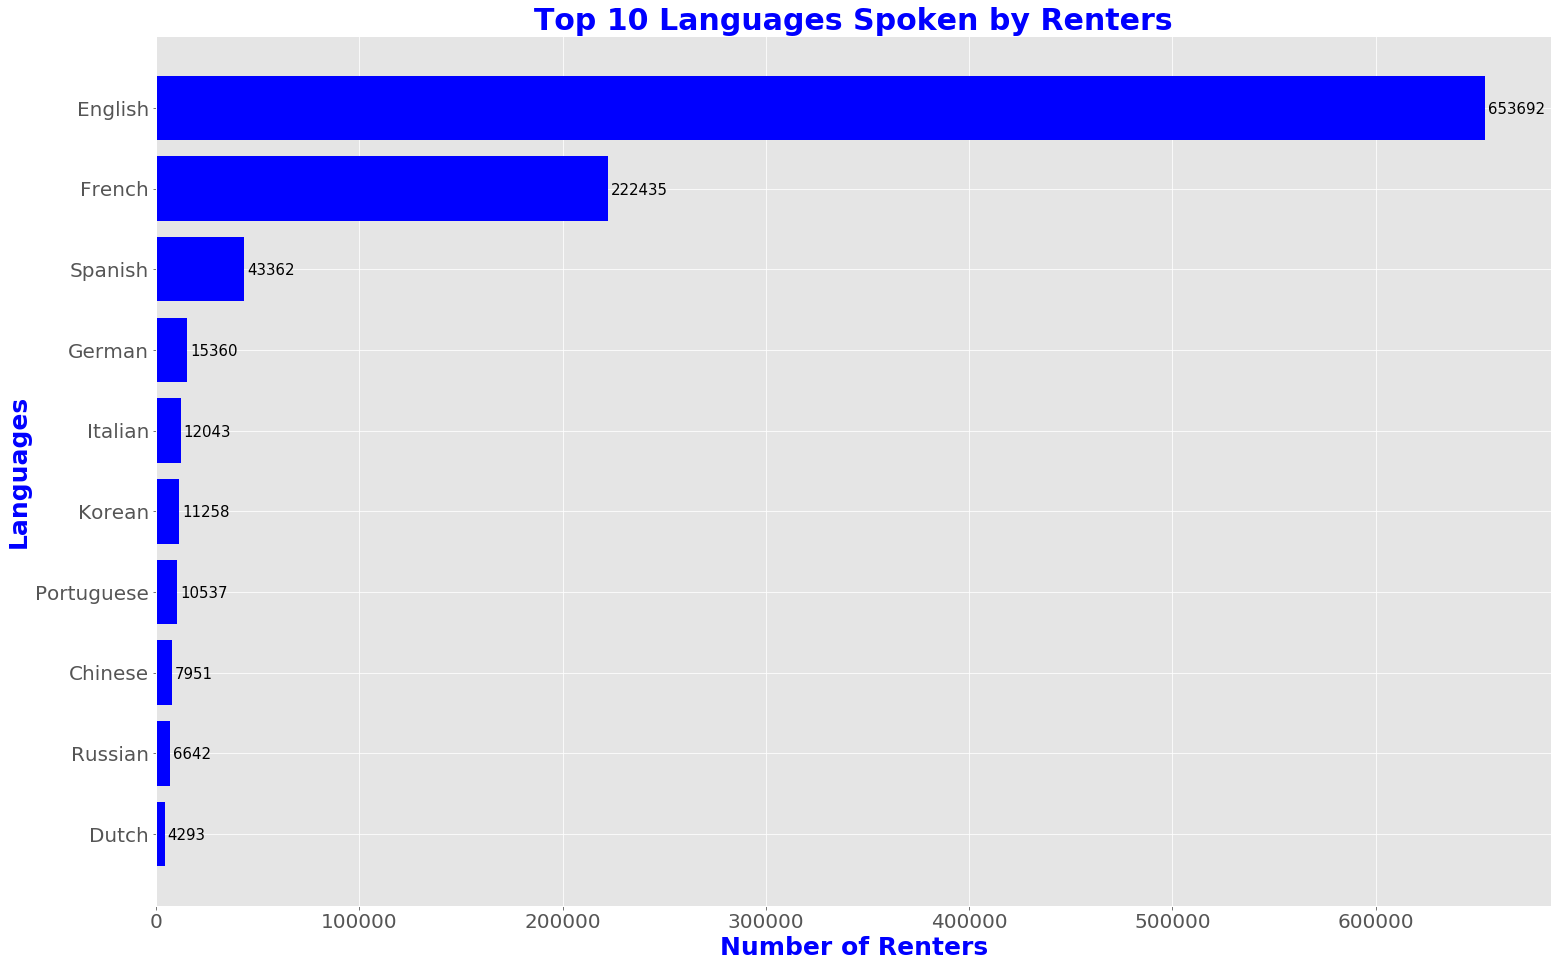

In [49]:
color = 'blue'
fig, ax = plt.subplots(figsize=(25,16))
items = ax.barh(language_count['language'], language_count['count'], color = color, align='center')
plt.xticks(size = 20, rotation=0)
plt.yticks(size = 20)
plt.xlabel('Number of Renters', size=25, color=color, weight='bold')
plt.ylabel('Languages', size=25, color=color, weight='bold')
plt.title('Top 10 Languages Spoken by Renters', fontsize=30, color=color, weight='bold')

autolabel(items, orientation='hort')

plt.show()

## 2. Percentage on Language Listers Speak (DONE) =DONT USE=

In [68]:
query = '''SELECT DISTINCT(language), COUNT(language) as count
            FROM paris_listings_language_df
            GROUP BY language
            ORDER BY count ASC'''

listing_language = spark.sql(query).toPandas()

In [69]:
listing_language.drop(0, inplace=True)
total = sum(listing_language['count'])
language_percentage = [(x/total)*100 for x in listing_language['count']]
listing_language['percentage'] = language_percentage
listing_language = listing_language.iloc[9:,:]

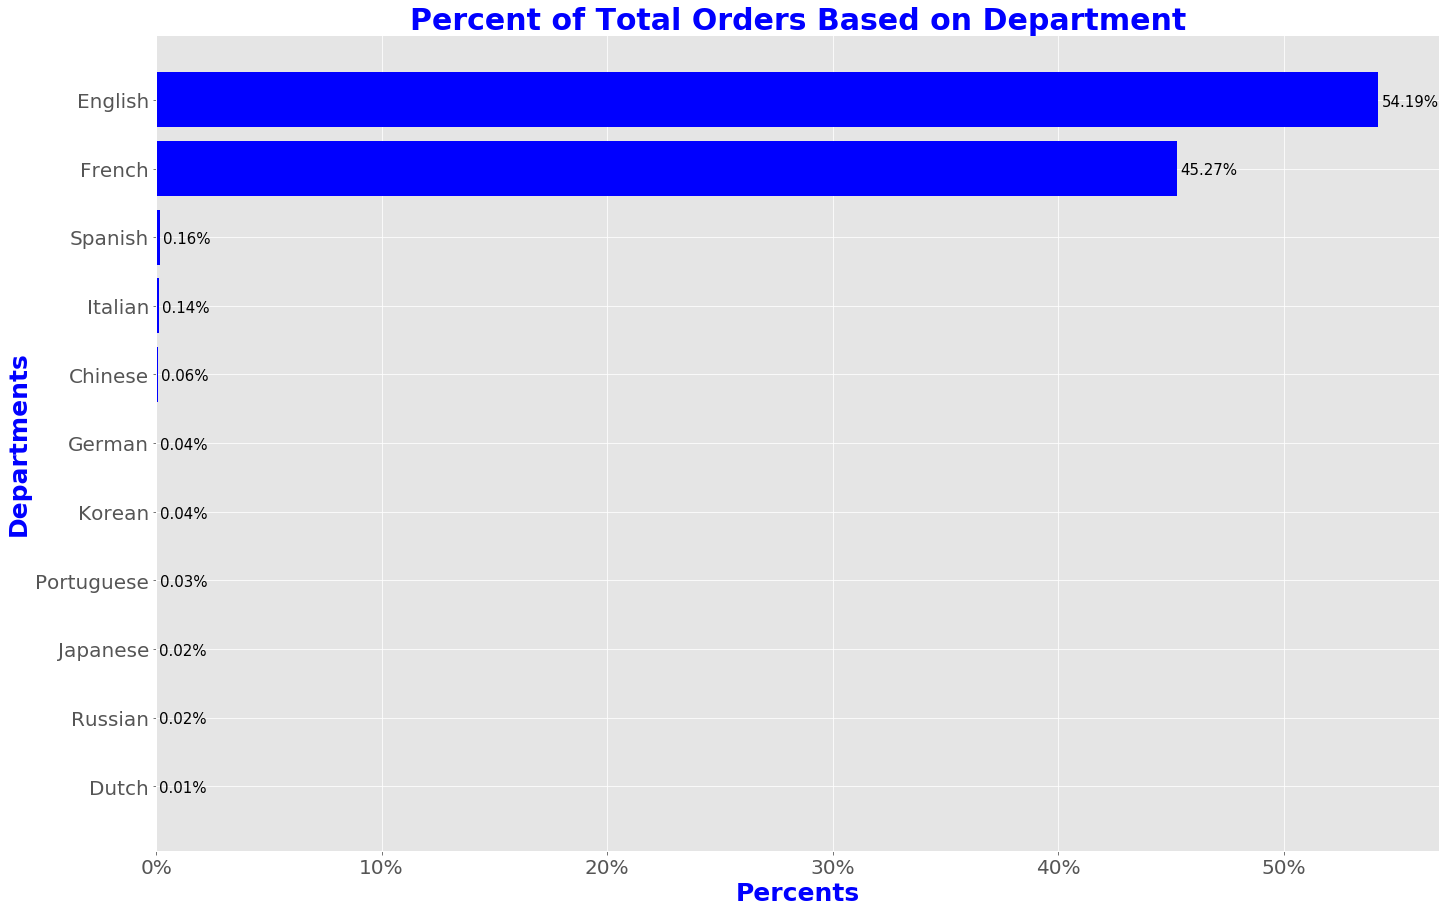

In [73]:
#DONE
#plot histogram of weekly rates
color = 'blue'
fig, ax = plt.subplots(figsize=(23,15))
items = ax.barh(listing_language['language'], listing_language['percentage'], color = color, align='center')
plt.xticks(size = 20, rotation=0)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))
plt.yticks(size = 20)
plt.xlabel('Percents', size=25, color = color, weight='bold')
plt.ylabel('Departments', size=25, color = color, weight='bold')
plt.title('Percent of Total Orders Based on Department', fontsize=30, color = color, weight='bold')

autolabel_percent(items, orientation='hort')

plt.show()

## 3.1 Histogram on listings per host (DONE) =NOT IN SLIDES=

In [9]:
#update the listings again
listings_per_host = pd.read_csv('Data/Paris/updated_listings.csv')

In [10]:
listings_per_host = listings_per_host.loc[:, ['host_id', 'host_total_listings_count']]

In [11]:
listings_per_host.to_csv('Data/Paris/listings_per_host.csv')

In [12]:
#paris LISTINGS
listings_per_host_df = spark.read.csv('Data/Paris/listings_per_host.csv',
                            header = True,
                            sep = ",",
                            inferSchema = True)

listings_per_host_df.createOrReplaceTempView('listings_per_host_df')

In [21]:
query = '''SELECT DISTINCT host_id, host_total_listings_count
            FROM listings_per_host_df'''

host_listing_count = spark.sql(query).toPandas()

In [75]:
host_listing_count

,host_id,host_total_listings_count
0,3497134,4.0
1,258595370,1.0
2,24624656,1.0
3,200103213,5.0
4,13431045,1.0
...,...,...
53970,116741609,1.0
53971,13733921,1.0
53972,6463494,1.0
53973,229227253,1.0


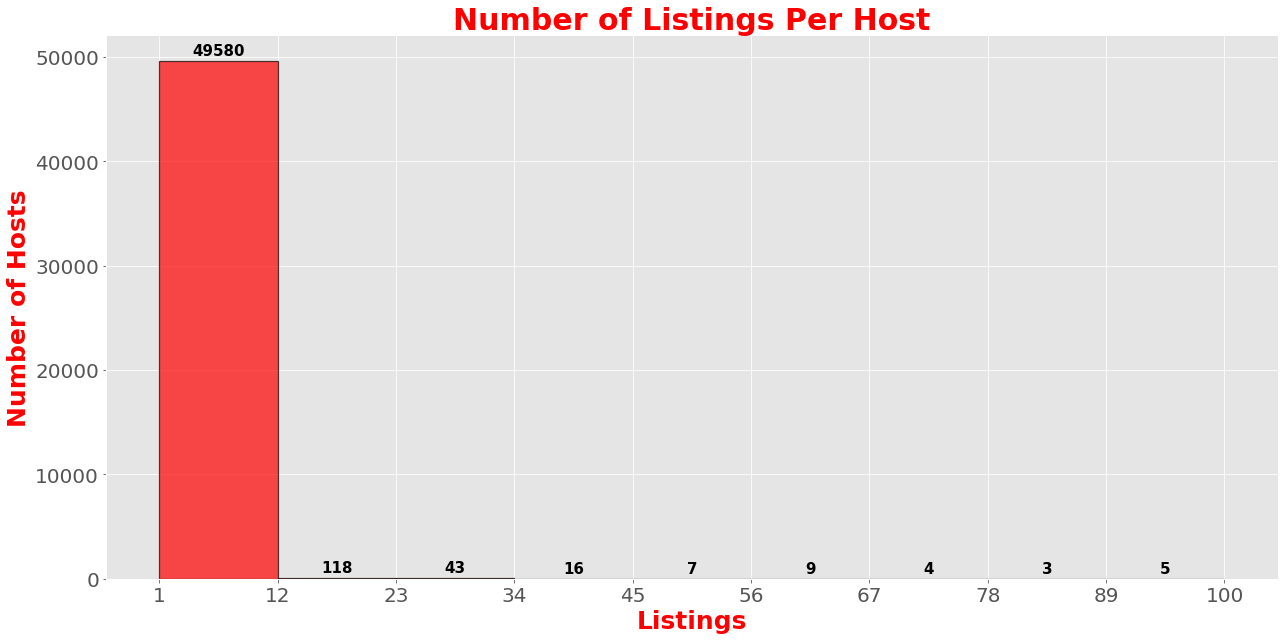

In [85]:
#DONE
#plot histogram of listings per host smaller bins
color = 'red'
fig, ax = plt.subplots(figsize=(21,10))
max_val = int(max(host_listing_count['host_total_listings_count']))

items, bins, patches = ax.hist(host_listing_count['host_total_listings_count'], bins = np.linspace(1, 100, 10), color = color, alpha=0.7, edgecolor='black', linewidth=1.2)
plt.xticks(np.linspace(1,100,10), size=20)
plt.yticks(size = 20)
plt.xlabel('Listings', size=25, color=color, weight='bold')
plt.ylabel('Number of Hosts', size=25, color=color, weight='bold')
plt.title('Number of Listings Per Host', fontsize=30, color=color, weight='bold')

autolabel(patches)

plt.show()

## 3.1 Histogram on listings per host MORE DEFINED (DONE) =NOT IN SLIDES=

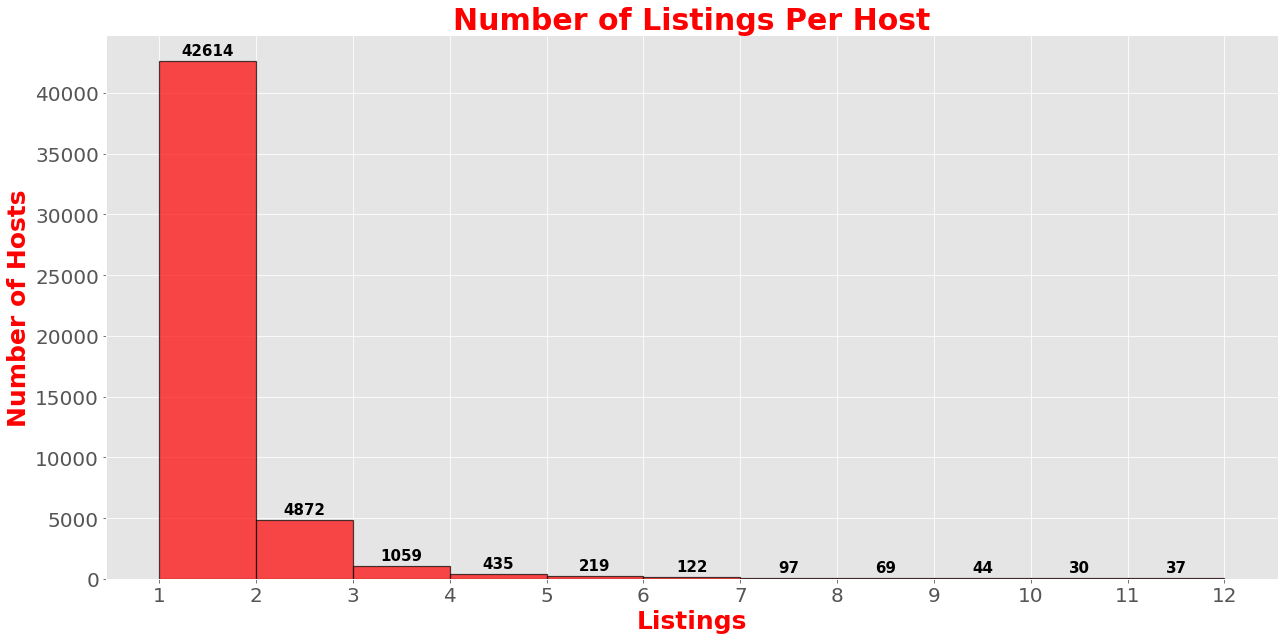

In [86]:
#DONE
#plot histogram of listings per host smaller bins
color = 'red'
fig, ax = plt.subplots(figsize=(21,10))
max_val = int(max(host_listing_count['host_total_listings_count']))

items, bins, patches = ax.hist(host_listing_count['host_total_listings_count'], bins = range(1, 13), color = color, alpha=0.7, edgecolor='black', linewidth=1.2)
plt.xticks(range(1, 13), size=20)
plt.yticks(size = 20)
plt.xlabel('Listings', size=25, color=color, weight='bold')
plt.ylabel('Number of Hosts', size=25, color=color, weight='bold')
plt.title('Number of Listings Per Host', fontsize=30, color=color, weight='bold')

autolabel(patches)

plt.show()

## 4. Map location of Listings. HEAT MAP MONTH (SKIP) 

## 5. Time series on calendar pricing

## 6. SuperHosts vs Regulars (DONE) =NOT IN SLIDES=

In [95]:
hosts = pd.read_csv('Data/Paris/updated_listings.csv')

In [101]:
num_hosts_vs_superhost = hosts.loc[:,['host_id','host_is_superhost']]

In [102]:
num_hosts_vs_superhost.to_csv('Data/Paris/num_hosts_vs_superhost.csv')

In [103]:
#paris LISTINGS
num_hosts_vs_superhost_df = spark.read.csv('Data/Paris/num_hosts_vs_superhost.csv',
                            header = True,
                            sep = ",",
                            inferSchema = True)

num_hosts_vs_superhost_df.createOrReplaceTempView('num_hosts_vs_superhost_df')

In [106]:
query = '''SELECT DISTINCT(host_id), host_is_superhost
            FROM num_hosts_vs_superhost_df'''

num_hosts_vs_superhost = spark.sql(query).toPandas()

In [125]:
num_hosts = num_hosts_vs_superhost_df[num_hosts_vs_superhost_df['host_is_superhost']=='f'].count()
num_superhosts = num_hosts_vs_superhost_df[num_hosts_vs_superhost_df['host_is_superhost']=='t'].count()
total_hosts = num_hosts+num_superhosts

In [133]:
percentage = [(num_hosts/total_hosts)*100, (num_superhosts/total_hosts)*100]
labels = ['Regular Hosts', 'Superhost']

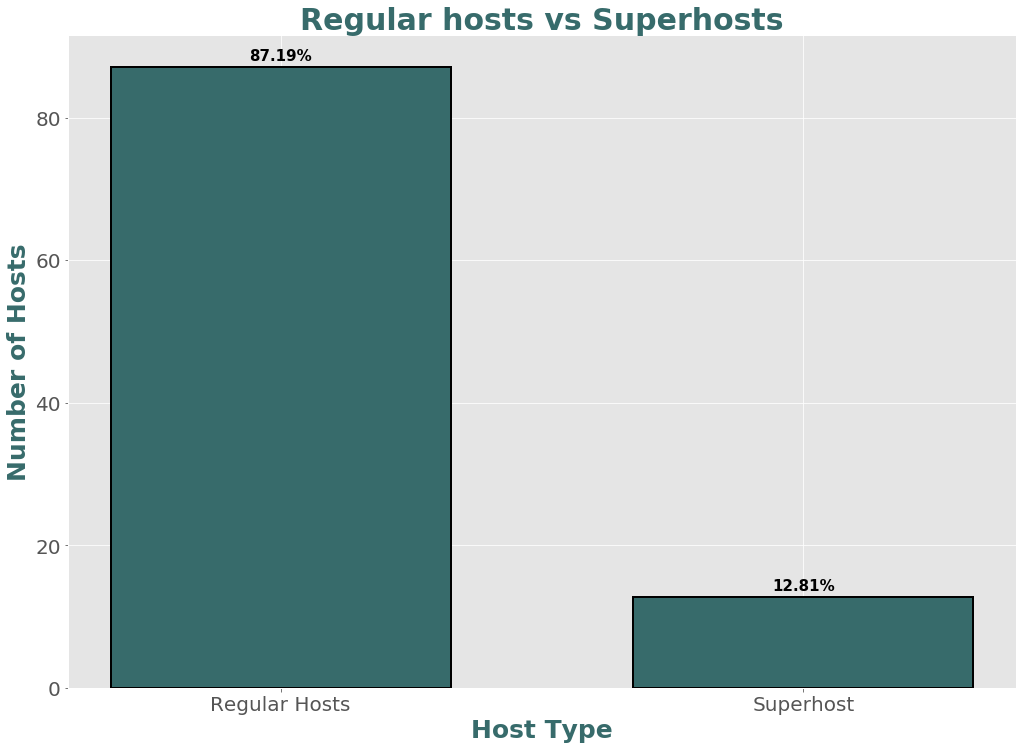

In [141]:
#TODO: done
color = '#376B6B'

fig, ax = plt.subplots(figsize=(17,12))
items = ax.bar(labels, percentage, color = color, align='center', width = 0.65, edgecolor='black', linewidth=2)
plt.xticks(size = 20, rotation=0)
plt.yticks(size = 20)
plt.xlabel('Host Type', size=25, color = color, weight='bold')
plt.ylabel('Number of Hosts', size=25, color = color, weight='bold')
plt.title('Regular hosts vs Superhosts', fontsize= 30, color = color, weight='bold')
autolabel_percent(items)

plt.show()

In [ ]:
# TODO:
#include significance of being a superhost

## 7. Predicitng Super Hosts

In [96]:
hosts.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'name', 'summary', 'space',
       'description', 'host_id', 'host_since', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'property_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'minimum_nights', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'cancellation_policy',
       'requires_license', 'reviews_per_month',
       'require_guest_phone_verification', 'language'],
      dtype='object')

In [98]:
host_superhost_for_modeling = hosts.loc[:,['id','host_id','host_response_time','host_response_rate',
                                                    'host_is_superhost','host_total_listings_count','host_verifications',
                                                    'number_of_reviews','review_scores_rating',
                                                    'review_scores_accuracy', 'review_scores_cleanliness',
                                                    'review_scores_checkin', 'review_scores_communication',
                                                    'review_scores_location', 'review_scores_value']]
#TODO: change all NaN values to 0; get number of host_verifications

In [148]:
host_superhost_for_modeling.to_csv('Data/Paris/host_superhost_for_modeling.csv')

In [ ]:
# #paris LISTINGS
# listings_per_host_df = spark.read.csv('Data/Paris/host_superhost_for_modeling.csv',
#                             header = True,
#                             sep = ",",
#                             inferSchema = True)

# listings_per_host_df.createOrReplaceTempView('listings_per_host_df')

In [188]:
host_superhost_for_modeling.iloc[:1, :]

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,33065009,28313443,within an hour,99.0,0,72.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",29,94,10.0,10.0,10,10.0,9.0,9.0


In [174]:
# # Dont touch

# #Change response_rate into floats
# host_superhost_for_modeling.drop(75924, inplace=True)
# host_response_rate = [float(x.replace('%','')) if isinstance(x, str) else float(0) for x in host_superhost_for_modeling['host_response_rate']]
# host_superhost_for_modeling['host_response_rate'] = host_response_rate

In [187]:
# #Dont touch

# #Change host_is_superhost into 1 for t, 0 for f
# host_is_superhost = [1 if x=='t' else 0 for x in host_superhost_for_modeling['host_is_superhost']]
# host_superhost_for_modeling['host_is_superhost'] = host_is_superhost

In [219]:
# #Dont touch

# #Change host_verifications to number of verficiations or dummy variables?
# host_verifications = ['' if isinstance(x,float) else x.replace(']','').replace('[','').replace("'",'').replace(',','').split() for x in host_superhost_for_modeling['host_verifications']]
# host_superhost_for_modeling['host_verifications'] = host_verifications

In [268]:
# #DO NOT TOUCH
# #Change NaN is review_scores_rating to 0
# review_score_rating = [0 if str(x) == 'nan' else x for x in  host_superhost_for_modeling['review_scores_rating']]
# host_superhost_for_modeling['review_scores_rating'] = review_score_rating

# review_scores_accuracy = [0 if str(x) == 'nan' else x for x in  host_superhost_for_modeling['review_scores_accuracy']]
# host_superhost_for_modeling['review_scores_accuracy'] = review_scores_accuracy

# review_scores_cleanliness = [0 if str(x) == 'nan' else x for x in  host_superhost_for_modeling['review_scores_cleanliness']]
# host_superhost_for_modeling['review_scores_cleanliness'] = review_scores_cleanliness


# review_scores_checkin = [0 if str(x) == 'nan' else x for x in  host_superhost_for_modeling['review_scores_checkin']]
# host_superhost_for_modeling['review_scores_checkin'] = review_scores_checkin


# review_scores_communication = [0 if str(x) == 'nan' else x for x in  host_superhost_for_modeling['review_scores_communication']]
# host_superhost_for_modeling['review_scores_communication'] = review_scores_communication


# review_scores_location = [0 if str(x) == 'nan' else x for x in  host_superhost_for_modeling['review_scores_location']]
# host_superhost_for_modeling['review_scores_location'] = review_scores_location


# review_scores_value = [0 if str(x) == 'nan' else x for x in  host_superhost_for_modeling['review_scores_value']]
# host_superhost_for_modeling['review_scores_value'] = review_scores_value

# host_total_listings_count = [0 if str(x) == 'nan' else x for x in  host_superhost_for_modeling['host_total_listings_count']]
# host_superhost_for_modeling['host_total_listings_count'] = host_total_listings_count


In [258]:
# #Remove messed up data collecting
# host_superhost_for_modeling.drop(host_superhost_for_modeling[host_superhost_for_modeling['host_response_time']=='Apartment'].index, inplace=True)


In [272]:
#Drop useless columns
host_superhost_for_modeling.drop(columns = ['id','host_id'], inplace=True)

In [273]:
#Save csv
host_superhost_for_modeling.to_csv('Data/Paris/host_superhost_for_modeling.csv')

In [269]:
host_superhost_for_modeling['host_response_time'].unique()

array(['within an hour', 'within a few hours', 'within a day', nan,
       'a few days or more'], dtype=object)

In [314]:
test_model = host_superhost_for_modeling.drop(columns=['host_verifications'])

In [286]:
'email' in ' '.join(test_df['host_verifications'][0])

True

In [310]:
# some_list=['email',
#  'phone',
#  'reviews',
#  'jumio',
#  'offline_government_id',
#  'government_id',
#  'work_email',
# 'email',
#  'phone',
#  'offline_government_id',
#  'selfie',
#  'government_id',
#  'identity_manual',
# 'email',
#  'phone',
#  'reviews',
#  'jumio',
#  'offline_government_id',
#  'selfie',
#  'government_id',
#  'identity_manual',
# 'email',
#  'phone',
#  'google',
#  'reviews',
#  'jumio',
#  'selfie',
#  'government_id',
#  'identity_manual',
# 'email',
#  'phone',
#  'facebook',
#  'reviews',
#  'jumio',
#  'offline_government_id',
#  'selfie',
#  'government_id',
#  'identity_manual',
# 'email',
#  'phone',
#  'reviews',
#  'jumio',
#  'offline_government_id',
#  'selfie',
#  'government_id',
#  'identity_manual',
#  'work_email']

# verification_list = np.unique(some_list)

In [316]:
test_model.iloc[:5,:]

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,within an hour,99.0,0,72.0,29,94,10.0,10.0,10,10.0,9.0,9.0
1,within an hour,100.0,0,1.0,15,77,8.0,9.0,9,9.0,10.0,8.0
2,within an hour,100.0,0,32.0,0,0,0,0,0,0.0,0.0,0.0
3,within an hour,100.0,0,1.0,0,0,0,0,0,0.0,0.0,0.0
4,within a few hours,100.0,0,1.0,4,100,10.0,10.0,10,10.0,10.0,10.0


# Modeling

In [324]:
#from class:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.res
    
def plot_roc(ax, df):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC")
    ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.set_title('ROC Curve')
    ax.legend()
    

In [287]:
# def modelling(text_series, y, vectorizer, model):
    
#     X = vectorizer.fit_transform(text_series)
    
#     if model.__class__.__name__ == "GaussianNB":
#         X = X.toarray()
        
#     X_train, X_test, y_train, y_test = train_test_split(X, y)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     accuracy = accuracy_score(y_test, y_pred)
    
#     probs = model.predict_proba(X_test)[:,1]
#     roc_auc = roc_auc_score(y_test, probs)
#     thresh_df =calculate_threshold_values(probs, y_test)
    
#     return (precision, recall, accuracy, probs, roc_auc, thres_df)

In [322]:
def modelling(X, y, model):
    
#     X = vectorizer.fit_transform(text_series)
    
#     if model.__class__.__name__ == "GaussianNB":
#         X = X.toarray()
        
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    probs = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, probs)
    thresh_df =calculate_threshold_values(probs, y_test)
    
    return (precision, recall, accuracy, probs, roc_auc, thresh_df)
#     return (probs, thres_df, roc_auc)

In [323]:
#DONT NEED
#import scipy.stats as scs
# def generate_classes(nptses, mus, sds):
#     """
#     Generate normally distributed points in multiple classes
#     Parameters
#     ----------
#     nptses : array_like (1-d)
#         sequence of numbers, the count of points in each class
#     mus : array_like (2-d)
#         sequence of vectors, the means of the multivariate distributions for each class
#     mus : array_like (3-d)
#         sequence of 2-d symmetric tensors, the standard deviation of the multivariate
#         distributions for each class
        
#     Returns
#     -------
#     X : array (2-d)
#         features of generated points
#     y : array (2-d)
#         integer labels of points, starting at 0
#     """

#     X = np.zeros((0,2))
#     y = np.zeros((0,))
    
#     for i, npts, mu, sd in zip(itertools.count(), nptses, mus, sds):
#         X = np.concatenate([X, scs.multivariate_normal(mu, sd).rvs(npts)])
#         y = np.concatenate([y, np.ones(npts)*i])
#     return X, y

In [331]:
# DONT NEED
# blaX, blay = generate_classes((1000,1000),
#                        ((2.0, 2.5),
#                         (6.0, 0.0)),
#                        (((2.0, 0),
#                          (0, 3.0)),
#                         ((2.5, 0),
#                          (0, 3.0)))
#                        )
# blaX
# blay

array([0., 0., 0., ..., 1., 1., 1.])

In [320]:
#models
logistic = LogisticRegression(C=1000)
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

# GNB = GaussianNB()
# MNB = MultinomialNB()
# BNB = BernouliNB()

In [308]:
X = pd.read_csv('Data/Paris/the_calendar_to_use.csv', nrows=25000)

In [309]:
y = X['price']

In [310]:
X.drop(columns=['price','Unnamed: 0', 'available', 'date', 'listing_id', 'minimum_nights','maximum_nights'], inplace=True)

In [311]:
X.columns

Index(['week', 'month', 'year'], dtype='object')

In [315]:
X = pd.get_dummies(X, columns=['week','month','year'],)

KeyError: "None of [Index(['week', 'month', 'year'], dtype='object')] are in the [columns]"

In [325]:
X

,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2019,year_2020
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
24998,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [320]:
probs, thres_df, roc_auc = modelling(X,y,gb)

ValueError: multiclass format is not supported

In [ ]:
fig, ax = subplots(figsize=(15,8))
plot_roc(ax, roc_auc)

# Model superhost classifications

In [318]:
y = test_model['host_is_superhost']
X = test_model.drop(columns=['host_is_superhost'])

In [321]:
precision, recall, accuracy, probs, roc_auc, thresh_df = modelling(X,y,logistic)

NameError: name 'modelling' is not defined